# Sales Analysis

## Real-world Data Wrangling

##### Fullname: Nguyễn Thị Thanh Vân

##### ID: 21IT186

##### Class: 21JIT

## 1. Gather data

#### 1.1. Problem Statement

#### Nguyễn Thị Thanh Vân
+ Question 1: Có xu hướng tăng trưởng doanh thu theo thời gian không?
+ Question 2: Nên hiển thị quảng cáo vào thời điểm nào để tối đa hóa khả năng khách hàng mua sản phẩm?
#### Nguyễn Hồng Sơn
+ Question 3: Những sản phẩm nào thường được bán cùng nhau nhất?
+ Question 4: Có mỗi quan hệ nào giữa giá bán và số lượng đặt hàng không?
#### Lê Thị Mơ
+ Question 5: Địa chỉ mua hàng có ảnh hưởng đến sản phẩm mà khách hàng mua không?
+ Question 6: Có mỗi quan hệ giữa sản phẩm và số lượng đặt hàng của khách hàng không?

#### 1.2. Gather at least two datasets using two different data gathering methods

#### Nguyễn Thị Thanh Vân
+ Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np

+ Merge data from each month into one CSV

In [2]:
# Đường dẫn tới thư mục chứa các tệp tin dữ liệu bán hàng
path = "./Sales_Data"

# Lấy danh sách tất cả các tệp tin trong thư mục, loại bỏ các tệp tin ẩn
files = [file for file in os.listdir(path) if not file.startswith('.')]

# Tạo DataFrame trống để lưu trữ dữ liệu từ tất cả các tệp tin
all_months_data = pd.DataFrame()

# Đọc dữ liệu từ từng tệp tin và nối vào DataFrame all_months_data
for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

# Lưu DataFrame all_months_data thành tệp tin CSV "all_data.csv" mà không bao gồm cột chỉ mục
all_months_data.to_csv("all_data.csv", index=False)

## 2. Assess data

###### I will assess the data both visually and programmatically to identify any data quality(content) issues and tidiness(structual) issues.

##### Nguyễn Thị Thanh Vân
+ Read in updated dataframe

In [2]:
# Đọc dữ liệu từ tệp tin CSV "all_data.csv" và lưu vào biến all_data
all_data = pd.read_csv("all_data.csv")

# Hiển thị nội dung của DataFrame all_data
display(all_data)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
# Hiển thị thông tin về DataFrame all_data
display(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


None

In [5]:
# Hiển thị số lượng giá trị null trong mỗi cột của DataFrame all_data
display(all_data.isnull().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# Hiển thị số lượng dòng trùng lặp trong DataFrame all_data
display(all_data.duplicated().sum())

1162

In [7]:
# Hiển thị báo cáo thống kê mô tả của DataFrame all_data
display(all_data.describe())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [8]:
# Hiển thị kiểu dữ liệu của từng cột trong DataFrame all_data
display(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## 3 Clean up the data!

###### The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Lê Thị Mơ
1. Issue 1: Drop rows of NAN

In [9]:
# Tạo DataFrame nan_df chứa các dòng có giá trị null
nan_df = all_data[all_data.isna().any(axis=1)]

# In kích thước của DataFrame nan_df
print(nan_df.shape)

# Hiển thị nội dung của DataFrame nan_df
display(nan_df.head())

# Hiển thị số lượng giá trị null trong mỗi cột của DataFrame all_data
display(all_data.isnull().sum())

(545, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

1.1 Observations:
+ Có 545 hàng có giá trị còn thiếu
+ Mỗi cột có 545 giá trị còn thiếu

1.2 Processing data: Xóa các hàng còn thiếu dữ liệu

In [10]:
# Loại bỏ các dòng có tất cả giá trị là null trong DataFrame all_data
all_data = all_data.dropna(how='all')

# Hiển thị số lượng giá trị null trong mỗi cột của DataFrame all_data
display(all_data.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

##### Lê Thị Mơ
2. Issue 2: Get rid of text in order date column

In [11]:
# Lọc các dòng trong DataFrame all_data có giá trị 'Order ID' trong cột 'Order ID'
df_filtered = all_data.loc[all_data['Order ID'] == 'Order ID']

# Hiển thị DataFrame df_filtered
display(df_filtered)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


2.1 Observations:
+ Có 355 hàng giá có trị sai cấu trúc

2.2 Processing data: Xóa các hàng có giá trị sai cấu trúc

In [12]:
# Loại bỏ các dòng trong DataFrame all_data có giá trị 'Order ID' trong cột 'Order ID'
all_data = all_data.drop(df_filtered.index)

# Lọc lại DataFrame all_data chỉ giữ lại những dòng có giá trị 'Order ID' trong cột 'Order ID'
df_filtered = all_data.loc[all_data['Order ID'] == 'Order ID']

# Hiển thị kích thước của DataFrame df_filtered
display(df_filtered.shape)

(0, 6)

##### Lê Thị Mơ
3. Issue 3: Make columns correct type

In [13]:
# Hiển thị kiểu dữ liệu của từng cột trong DataFrame all_data
display(all_data.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

3.1 Observations:
+ Có 2 cột cần đổi kiểu dữ liệu thành dạng số là 'Quantity Ordered' và 'Price Each'.

3.2 Processing data: Đổi kiểu dữ liệu của 2 cột 'Quantity Ordered' và 'Price Each' thành dạng số.

In [14]:
# Chuyển đổi kiểu dữ liệu của cột 'Quantity Ordered' thành dạng số
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

# Chuyển đổi kiểu dữ liệu của cột 'Price Each' thành dạng số
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Hiển thị kiểu dữ liệu của từng cột trong DataFrame all_data
display(all_data.dtypes)

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

##### Nguyễn Hồng Sơn
4. Issue 4:  Duplicates

In [15]:
# Tìm và hiển thị các dòng trùng lặp trong DataFrame all_data
duplicated = all_data[all_data.duplicated()]
display(duplicated)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1302,177795,Apple Airpods Headphones,1,150.00,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
3805,180207,Apple Airpods Headphones,1,150.00,04/13/19 01:46,"196 7th St, Los Angeles, CA 90001"
4196,180576,Lightning Charging Cable,1,14.95,04/18/19 17:23,"431 Park St, Dallas, TX 75001"
...,...,...,...,...,...,...
184940,257530,USB-C Charging Cable,1,11.95,09/03/19 11:13,"192 Johnson St, San Francisco, CA 94016"
186173,258715,Lightning Charging Cable,1,14.95,09/15/19 16:50,"550 10th St, Portland, OR 97035"
186508,259035,27in FHD Monitor,1,149.99,09/29/19 13:52,"327 Lake St, San Francisco, CA 94016"
186782,259296,Apple Airpods Headphones,1,150.00,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


4.1. Observations:
+ Có 264 hàng trùng lặp trong dữ liệu.

4.2. Processing data: dữ lại các hàng trùng lặp 
+ Mặc dù có dữ liệu trùng lặp nhưng việc xóa các hàng trùng lặp trong phân tích dữ liệu bán hàng có thể ảnh hưởng đến kết quả phân tích và hiểu biết về doanh thu, khách hàng và các thông số quan trọng khác. Nên trong trường hợp này chúng ta không nên thực hiện việc xóa các hàng trùng lặp đó.

#### Nguyễn Hồng Sơn
5. Issue 5:  Augment data with additional columns

5.1 Issue 5.1: Add time column

In [16]:
# Chuyển đổi cột 'Order Date' thành kiểu dữ liệu datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Tạo cột 'Day' lưu giá trị ngày từ cột 'Order Date'
all_data['Day'] = all_data['Order Date'].dt.day

# Tạo cột 'Month' lưu giá trị tháng từ cột 'Order Date'
all_data['Month'] = all_data['Order Date'].dt.month

# Tạo cột 'Hour' lưu giá trị giờ từ cột 'Order Date'
all_data['Hour'] = all_data['Order Date'].dt.hour

# Tạo cột 'Minute' lưu giá trị phút từ cột 'Order Date'
all_data['Minute'] = all_data['Order Date'].dt.minute

# Tạo cột 'Count' với giá trị mặc định là 1 để đếm số lượng hàng trong mỗi dòng
all_data['Count'] = 1

# Hiển thị 5 dòng đầu tiên của DataFrame all_data sau khi thêm các cột mới
display(all_data.head())

C:\Users\NHS24\AppData\Local\Temp\ipykernel_13644\3827123604.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Day,Month,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",19,4,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",7,4,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,4,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",30,4,9,27,1


5.2 Issue 5.2: Add Total column

In [17]:
# Tính toán tổng giá trị đơn hàng cho mỗi dòng và thêm cột 'Total' vào DataFrame all_data
all_data['Total'] = all_data['Quantity Ordered'] * all_data['Price Each']

5.3 Issue 5.3: Add city column

In [18]:
# Định nghĩa hàm để lấy thông tin thành phố từ địa chỉ
def get_city(address):
    return address.split(",")[1].strip(" ")

# Định nghĩa hàm để lấy thông tin tiểu bang từ địa chỉ
def get_state(address):
    return address.split(",")[2].split(" ")[1]

# Áp dụng hàm get_city và get_state vào cột 'Purchase Address' để tạo cột 'City' mới
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")

# Kiểm tra các giá trị null trong DataFrame all_data
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Day                 0
Month               0
Hour                0
Minute              0
Count               0
Total               0
City                0
dtype: int64

## Update your data store
#### Nguyễn Hồng Sơn

+ Update the database/data store with the cleaned data

In [19]:
# Ghi DataFrame all_data đã được làm sạch vào tệp tin CSV có tên là 'data_cleaned.csv'
all_data.to_csv('data_cleaned.csv')

## 5. Visualizations
###### Create at least 6 plots.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Đọc dữ liệu từ tệp tin CSV 'data_cleaned.csv' và tạo DataFrame
df = pd.read_csv('data_cleaned.csv')

##### 5.1 Biểu hình tròn (pie chart) cho doanh thu theo từng thành phố
##### Nguyễn Thị Thanh Vân

City
Atlanta  (GA)          2795498.58
Austin  (TX)           1819581.75
Boston  (MA)           3661642.01
Dallas  (TX)           2767975.40
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Portland  (ME)          449758.27
Portland  (OR)         1870732.34
San Francisco  (CA)    8262203.91
Seattle  (WA)          2747755.48
Name: Total, dtype: float64


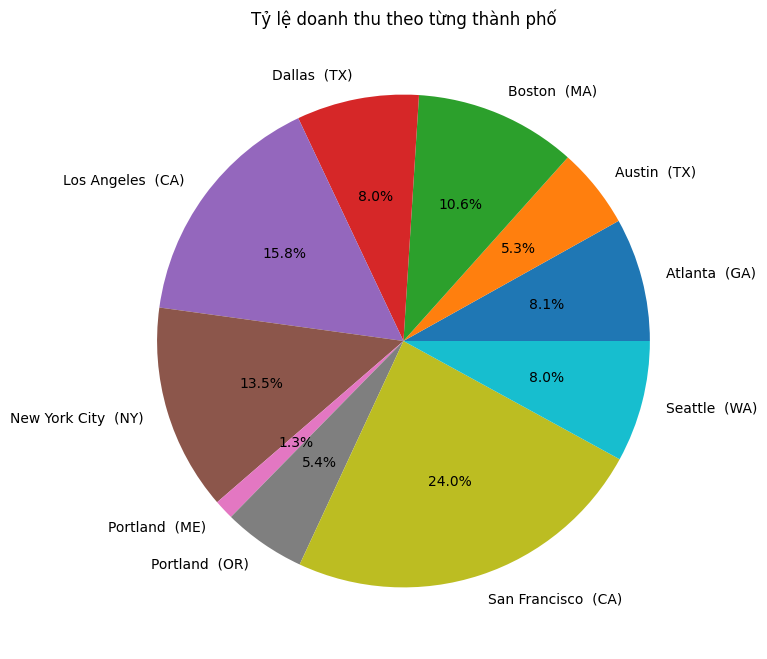

In [22]:
# Tính tổng doanh thu theo từng thành phố bằng cách nhóm theo cột 'City' và tính tổng cột 'Total'
revenue_by_city = df.groupby('City')['Total'].sum()
print(revenue_by_city)

# Tạo một đối tượng hình vẽ có kích thước 8x8 inches
plt.figure(figsize=(8, 8))

# Vẽ biểu đồ pie (hình tròn) dựa trên tỷ lệ doanh thu từng thành phố,
# sử dụng nhãn là các thành phố và hiển thị tỷ lệ theo định dạng '%1.1f%%'
plt.pie(revenue_by_city, labels=revenue_by_city.index, autopct='%1.1f%%')

# Đặt tiêu đề cho biểu đồ
plt.title('Tỷ lệ doanh thu theo từng thành phố')

# Hiển thị biểu đồ
plt.show()

5.1.1: Observations:
+ Dữ liệu doanh thu cho thấy San Francisco(24%), Los Angeles(15.8%) và New York City(13.5%) là những thành phố có doanh thu cao nhất, trong khi Portland (ME)(1.3%) và Portland (OR)(5.4%) có doanh thu thấp nhất. Các thành phố lớn và kinh đô tài chính có tiềm năng kinh doanh lớn, trong khi các thành phố nhỏ hơn có thể cần nỗ lực để phát triển thị trường.

#### Nguyễn Thị Thanh Vân
##### 5.2 Biểu đồ cột (bar chart) cho doanh thu theo tháng

Month
1     1811768.38
2     2188884.72
3     2791207.83
4     3367671.02
5     3135125.13
6     2562025.61
7     2632539.56
8     2230345.42
9     2084992.09
10    3715554.83
11    3180600.68
12    4588415.41
Name: Price Each, dtype: float64


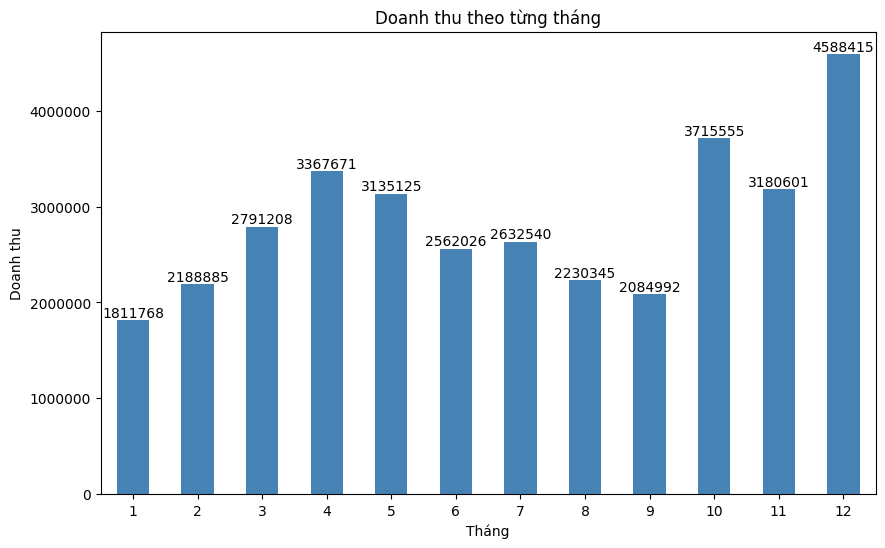

In [23]:
# Tính tổng doanh thu theo từng tháng bằng cách nhóm theo cột 'Month' và tính tổng cột 'Price Each'
revenue_by_month = df.groupby('Month')['Price Each'].sum()
print(revenue_by_month)

# Tạo một đối tượng hình vẽ có kích thước 10x6 inches
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ bar (cột) dựa trên tổng doanh thu từng tháng, với màu sắc là 'steelblue'
revenue_by_month.plot(kind='bar', color='steelblue')

# Hiển thị giá trị của từng cột trên biểu đồ
for i, v in enumerate(revenue_by_month):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

# Đặt nhãn cho trục x và trục y
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')

# Đặt các nhãn trên trục x xoay 0 độ
plt.xticks(rotation=0)

# Đặt tiêu đề cho biểu đồ
plt.title('Doanh thu theo từng tháng')

# Định dạng giá trị trên trục y dưới dạng số nguyên
plt.ticklabel_format(style='plain', axis='y')

##### Observations:
+ Tháng 10 và tháng 12 có doanh thu cao nhất, lần lượt là 3,715,554.83 đô la và 4,588,415.41 đô la. Điều này có thể liên quan đến mùa mua sắm cuối năm và các dịp lễ lớn như Halloween, Black Friday và Giáng sinh.
+ Tháng 4 và tháng 11 cũng có doanh thu khá cao, lần lượt là 3,367,671.02 đô la và 3,180,600.68 đô la. Điều này có thể chỉ ra một sự tăng trưởng trong hoạt động kinh doanh trong những tháng này.
+ Trong khoảng thời gian từ tháng 1 đến tháng 3 và từ tháng 5 đến tháng 9, doanh thu dao động ở mức trung bình, với mức đỉnh là tháng 3 (2,791,207.83 đô la) và mức thấp nhất là tháng 9 (2,084,992.09 đô la).

#### Lê Thị Mơ
##### 5.3 Biểu đồ đường (Line Chart) - Số lượng đặt hàng trong ngày

Hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64


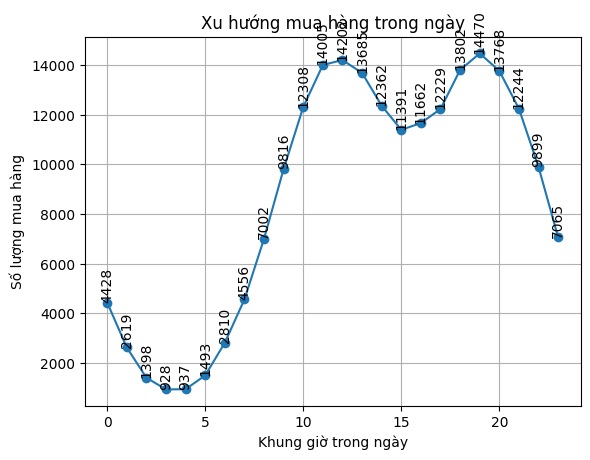

In [24]:
# Tính tổng số lượng mua hàng theo giờ trong ngày
hourly_purchases = df.groupby('Hour')['Quantity Ordered'].sum()
print(hourly_purchases)

# Vẽ biểu đồ xu hướng mua hàng trong ngày
plt.plot(hourly_purchases.index, hourly_purchases.values, marker='o', linestyle='-')

# Đặt tên cho trục x và trục y
plt.xlabel('Khung giờ trong ngày')
plt.ylabel('Số lượng mua hàng')
plt.grid(True)
# Đặt tiêu đề cho biểu đồ
plt.title('Xu hướng mua hàng trong ngày')

# Hiển thị giá trị tại mỗi đỉnh
for x, y in zip(hourly_purchases.index, hourly_purchases.values):
    plt.text(x, y, str(y), ha='center', va='bottom', rotation=90)

# Hiển thị biểu đồ
plt.show()

##### Observations:
+ Có sự tăng cao của hoạt động mua hàng vào giữa buổi sáng (9-10 giờ) và buổi tối (18-21 giờ).
+ Giờ mua hàng cao nhất là 19 giờ, theo sau là 12 giờ và 20 giờ.
+ Giờ mua hàng thấp nhất là từ 2-4 giờ sáng.
+ Trong khoảng thời gian từ 5 giờ sáng đến 17 giờ chiều, mức mua hàng ổn định.
+ Tổng số lượng mua hàng trong năm là 169,765, cho thấy nhu cầu mua hàng đáng kể.

#### Lê Thị Mơ
##### 5.4  Biểu đồ hình tròn ghép (Donut chart) -  Tỷ lệ phần trăm số lượng đơn hàng được đặt hàng của các thành phố.

City
Atlanta  (GA)          16602
Austin  (TX)           11153
Boston  (MA)           22528
Dallas  (TX)           16730
Los Angeles  (CA)      33289
New York City  (NY)    27932
Portland  (ME)          2750
Portland  (OR)         11303
San Francisco  (CA)    50239
Seattle  (WA)          16553
Name: Quantity Ordered, dtype: int64


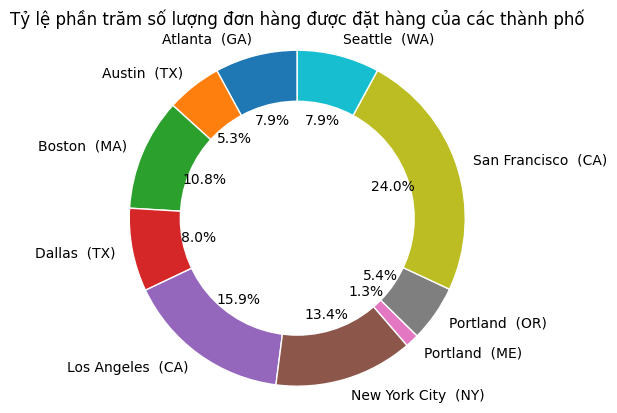

In [25]:
# Tính tổng số lượng đơn hàng được đặt hàng theo thành phố
city_totals = df.groupby('City')['Quantity Ordered'].sum()
print(city_totals)

# Tạo danh sách nhãn từ các thành phố
labels = city_totals.index

# Tạo danh sách tổng số lượng đơn hàng
totals = city_totals.values

# Vẽ biểu đồ hình tròn (pie chart) với tỷ lệ phần trăm số lượng đơn hàng của các thành phố
plt.pie(totals, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Tạo một vòng tròn ở giữa biểu đồ
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Đặt tiêu đề cho biểu đồ
plt.title('Tỷ lệ phần trăm số lượng đơn hàng được đặt hàng của các thành phố')

# Đảm bảo biểu đồ hình tròn trông cân đối
plt.axis('equal')

# Hiển thị biểu đồ
plt.show()

##### Observations:
+ Có thể nhận thấy sự khác biệt về mức độ hoạt động mua hàng giữa các thành phố. San Francisco (CA) có số đơn hàng cao nhất với 50,239 đơn hàng, trong khi Portland (ME) có số đơn hàng thấp nhất với 2,750 đơn hàng.

#### Nguyễn Hồng Sơn
##### 5.5 Biểu đồ phân tán (scatter chart) - Mối quan hệ giữa giá bán và số lượng đặt hàng

        Price Each  Quantity Ordered
0            11.95                 2
1            99.99                 1
2           600.00                 1
3            11.99                 1
4            11.99                 1
...            ...               ...
185945        2.99                 3
185946      700.00                 1
185947      700.00                 1
185948      379.99                 1
185949       11.95                 1

[185950 rows x 2 columns]


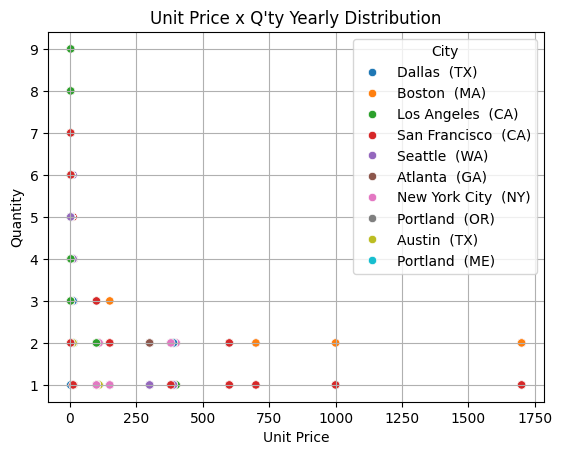

In [26]:
# Vẽ biểu đồ scatterplot với các biến 'Price Each', 'Quantity Ordered' và 'City'
sns.scatterplot(data=df, x='Price Each', y='Quantity Ordered', hue='City')
print(df[['Price Each','Quantity Ordered']])

# Đặt tiêu đề cho biểu đồ
plt.title("Unit Price x Q'ty Yearly Distribution")

# Đặt tên cho trục x và trục y
plt.xlabel('Unit Price')
plt.ylabel("Quantity")

# Hiển thị lưới trên biểu đồ
plt.grid(True)

##### Observations:
+ Thành phố San Francisco (CA) có lượng đặt hàng ổn định từ tất cả các mức giá của sản phẩm.
+ Thành Phố Dallas (TX) có lượng đặt hàng tập trung vào mức giá từ 250$ đến 500$.
+ Thành Phố New York City (NY) mặc dù có doanh thu cao nhưng chỉ tập trung vào các sản phẩm có mức giá dưới 500$.

#### Nguyễn Hồng Sơn
##### 5.6 Biểu đồ nhiệt (Heat chart) - Lượng mua hàng theo ngày trong năm

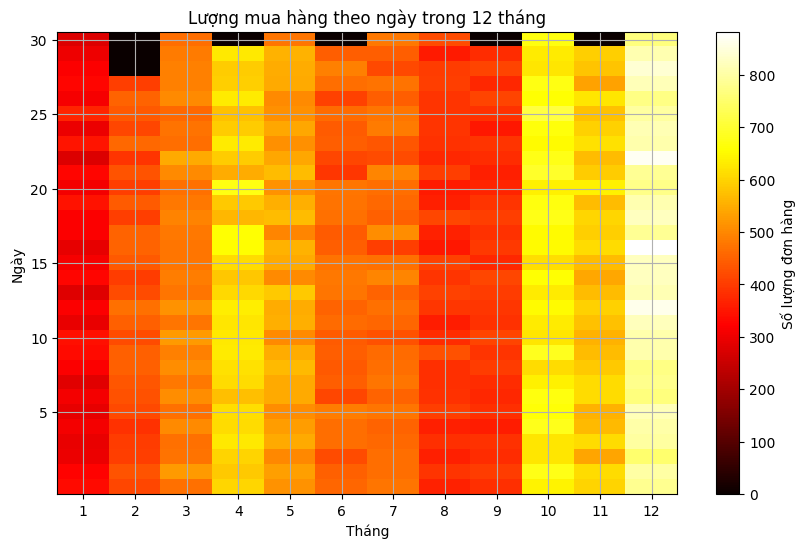

In [27]:
# Chuyển đổi cột 'Order Date' sang định dạng datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Tạo danh sách số lượng đơn hàng theo ngày và tháng
order_count_by_day_month = df.groupby(['Month', 'Day'])['Order ID'].count()

# Tạo mảng hai chiều để lưu trữ số lượng đơn hàng theo ngày và tháng
order_count_matrix = np.zeros((12, 31))

# Điền số lượng đơn hàng vào mảng hai chiều
for index, count in order_count_by_day_month.items():
    month = index[0]
    day = index[1]
    order_count_matrix[month-1, day-1] = count

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(10, 6))
plt.imshow(order_count_matrix.T, cmap='hot', aspect='auto')
plt.xticks(range(12), [i+1 for i in range(12)])
plt.yticks(range(5, 31, 5))
plt.gca().invert_yaxis()
plt.title('Lượng mua hàng theo ngày trong 12 tháng')
plt.xlabel('Tháng')
plt.ylabel('Ngày')
plt.grid(True)

# Hiển thị biểu đồ
colorbar = plt.colorbar()
colorbar.set_label('Số lượng đơn hàng')
plt.show()

##### Observations:
+ Lượng mua hàng trung bình của tháng 1 tháng 2 tháng 8 tháng 9 là 200 đến 300 trên một ngày.
+ Tháng 4 , tháng 10, tháng 11 và tháng 12 là những tháng có lượng mua trong ngày cao. (Tháng 12 với từ 800 trở lên)

### Data Exploration!

#### Nguyễn Thị Thanh Vân
##### Question 1: Có xu hướng tăng trưởng doanh thu theo thời gian không?

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total, dtype: float64


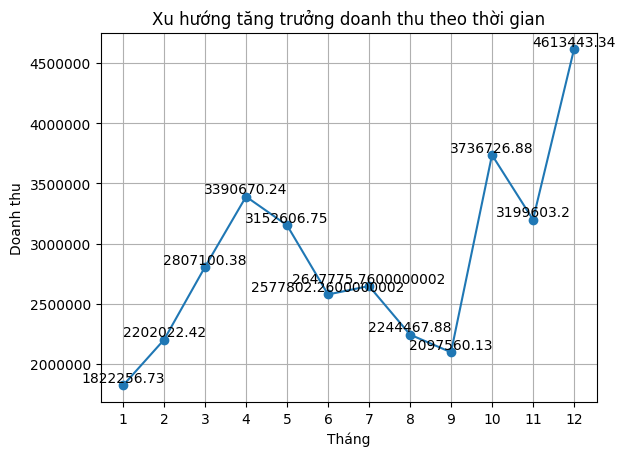

In [28]:
# Nhóm dữ liệu theo tháng và tính tổng doanh thu theo tháng
monthly_revenue = df.groupby('Month')['Total'].sum()
print(monthly_revenue)

# Tạo biểu đồ đường
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Xu hướng tăng trưởng doanh thu theo thời gian')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(monthly_revenue.index)
plt.ticklabel_format(style='plain')
plt.grid(True)

# Thêm giá trị tại mỗi đỉnh
for x, y in zip(monthly_revenue.index, monthly_revenue.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.show()

##### Observations:
+ Từ dữ liệu trên, chúng ta có thể nhận thấy một xu hướng tăng trưởng doanh thu theo thời gian. Đặc biệt, từ tháng 1 đến tháng 12, doanh thu tăng dần từ $1,822,256.73 lên đến $4,613,443.34. Mặc dù có sự dao động nhất định trong các tháng, tổng quan chúng ta có thể thấy một xu hướng tăng trưởng tích cực của doanh thu trong năm.

#### Nguyễn Thị Thanh Vân
##### Question 2: Nên hiển thị quảng cáo vào thời điểm nào để tối đa hóa khả năng khách hàng mua sản phẩm?

Hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64


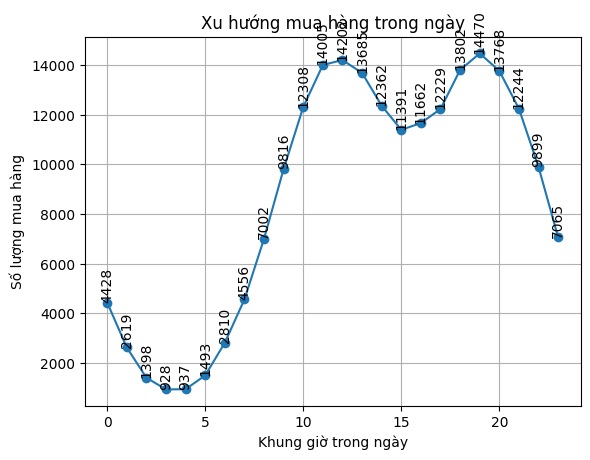

In [29]:
# Tính tổng số lượng mua hàng theo giờ trong ngày
hourly_purchases = df.groupby('Hour')['Quantity Ordered'].sum()
print(hourly_purchases)

# Vẽ biểu đồ xu hướng mua hàng trong ngày
plt.plot(hourly_purchases.index, hourly_purchases.values, marker='o', linestyle='-')

# Đặt tên cho trục x và trục y
plt.xlabel('Khung giờ trong ngày')
plt.ylabel('Số lượng mua hàng')
plt.grid(True)
# Đặt tiêu đề cho biểu đồ
plt.title('Xu hướng mua hàng trong ngày')

# Hiển thị giá trị tại mỗi đỉnh
for x, y in zip(hourly_purchases.index, hourly_purchases.values):
    plt.text(x, y, str(y), ha='center', va='bottom', rotation=90)

# Hiển thị biểu đồ
plt.show()

##### Observations:
+ Hầu hết trong các khung giờ đều có lượng mua hàng nhất định.
+ Giờ 9-12 sáng: Các giờ này (đặc biệt là giờ 10-12) có số lượng đơn hàng cao nhất trong ngày. Đây là thời điểm mà khách hàng có xu hướng mua hàng nhiều nhất. Do đó, hiển thị quảng cáo trong khoảng thời gian này có thể tối đa hóa khả năng khách hàng mua sản phẩm.
+ Giờ 18-21 tối: Đây là khoảng thời gian có số lượng đơn hàng cao và là thời điểm sau giờ làm việc khi nhiều người có thể dành thời gian mua sắm. Hiển thị quảng cáo vào thời điểm này cũng có thể tăng khả năng khách hàng mua sản phẩm.
+ Giờ 6-8 sáng và giờ 16-17 chiều: Đây là thời điểm trước và sau giờ làm việc khi nhiều người đang di chuyển và có thể có nhu cầu mua sắm. Hiển thị quảng cáo trong khoảng thời gian này cũng có thể thu hút khách hàng và tăng khả năng mua hàng.

#### Nguyễn Hồng Sơn
##### Question 3: Những sản phẩm nào thường được bán cùng nhau nhất?

In [30]:
# Lọc các dòng có Order ID trùng lặp và tạo một DataFrame mới
df_order_id_duplicate = df[df['Order ID'].duplicated(keep=False)].copy()

# Sử dụng groupby và transform để nhóm các sản phẩm tương ứng với mỗi Order ID
df_order_id_duplicate.loc[:, 'Grouped'] = df_order_id_duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Lấy ra các cột 'Order ID' và 'Grouped' duy nhất
df_order_id = df_order_id_duplicate[['Order ID', 'Grouped']].drop_duplicates()

product_counts = {}
for grouped_products in df_order_id['Grouped']:
    products = grouped_products.split(',')
    for i in range(len(products)):
        for j in range(i + 1, len(products)):
            pair = (products[i], products[j])
            if pair in product_counts:
                product_counts[pair] += 1
            else:
                product_counts[pair] = 1

# Tạo DataFrame từ kết quả đếm
df_product_counts = pd.DataFrame(list(product_counts.items()), columns=['Product Pair', 'Count'])

# Sắp xếp theo số lần xuất hiện giảm dần
df_product_counts = df_product_counts.sort_values(by='Count', ascending=False)

In [31]:
# Lấy thông tin của 10 cặp sản phẩm xuất hiện nhiều nhất
top_10_product_pairs = df_product_counts.head(10)

# In ra danh sách cặp sản phẩm và số lần xuất hiện
for index, row in top_10_product_pairs.iterrows():
    product_pair = row['Product Pair']
    count = row['Count']
    print(f"{product_pair} {count}")

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\NHS24\AppData\Local\Temp\ipykernel_13644\2970587984.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


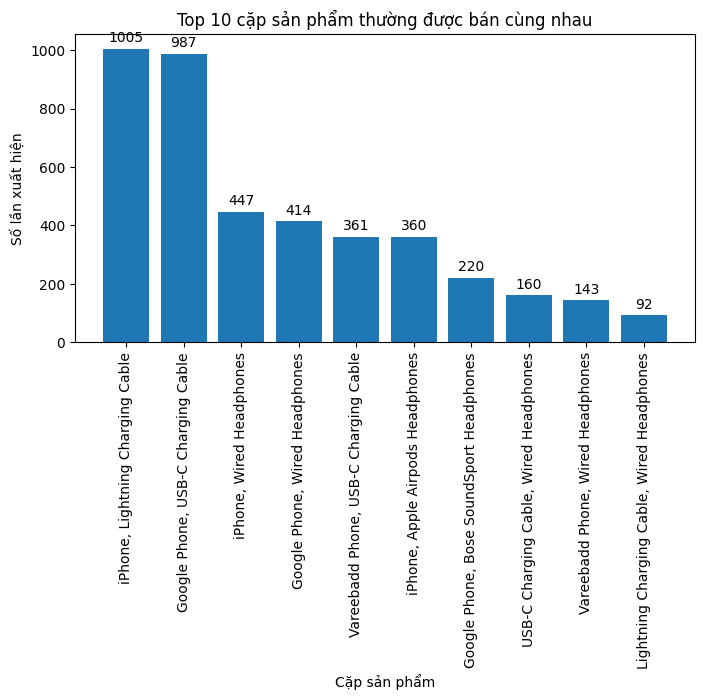

In [45]:
# Tách các sản phẩm và số lần xuất hiện thành các danh sách riêng biệt
products = [', '.join(pair) for pair in top_10_product_pairs['Product Pair']]
counts = top_10_product_pairs['Count']

# Vẽ biểu đồ
plt.figure(figsize=(8, 4))
plt.bar(products, counts)
plt.xlabel('Cặp sản phẩm')
plt.ylabel('Số lần xuất hiện')
plt.title('Top 10 cặp sản phẩm thường được bán cùng nhau')

# Hiển thị giá trị trên từng cột
for x, y in zip(products, counts):
    plt.annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center')

plt.xticks(rotation=90)  # Xoay nhãn trục x nếu cần thiết
plt.tight_layout()
plt.show()

##### Observations:
+ Cặp ('iPhone', 'Lightning Charging Cable') với 1,005 đơn hàng.
+ Cặp ('Google Phone', 'USB-C Charging Cable') với 987 đơn hàng.
+ Đây là những cặp sản phẩm có số lượng đơn hàng cao nhất và thường được mua cùng nhau nhất. Điều này có thể cho thấy mối quan hệ hoặc nhu cầu tương tự giữa các sản phẩm này và có thể hướng dẫn cho việc đặt quảng cáo hoặc kinh doanh đồng thời để tối ưu hóa doanh số bán hàng.


##### Question 4: Có mỗi qua hệ nào giữa giá bán và số lượng đặt hàng không?

                       Product  Quantity Ordered  Price Each
0       AAA Batteries (4-pack)             31017        2.99
1        AA Batteries (4-pack)             27635        3.84
2         USB-C Charging Cable             23975       11.95
3     Lightning Charging Cable             23217       14.95
4             Wired Headphones             20557       11.99
5     Apple Airpods Headphones             15661      150.00
6   Bose SoundSport Headphones             13457       99.99
7             27in FHD Monitor              7550      149.99
8                       iPhone              6849      700.00
9       27in 4K Gaming Monitor              6244      389.99
10      34in Ultrawide Monitor              6199      379.99
11                Google Phone              5532      600.00
12               Flatscreen TV              4819      300.00
13          Macbook Pro Laptop              4728     1700.00
14             ThinkPad Laptop              4130      999.99
15                20in M

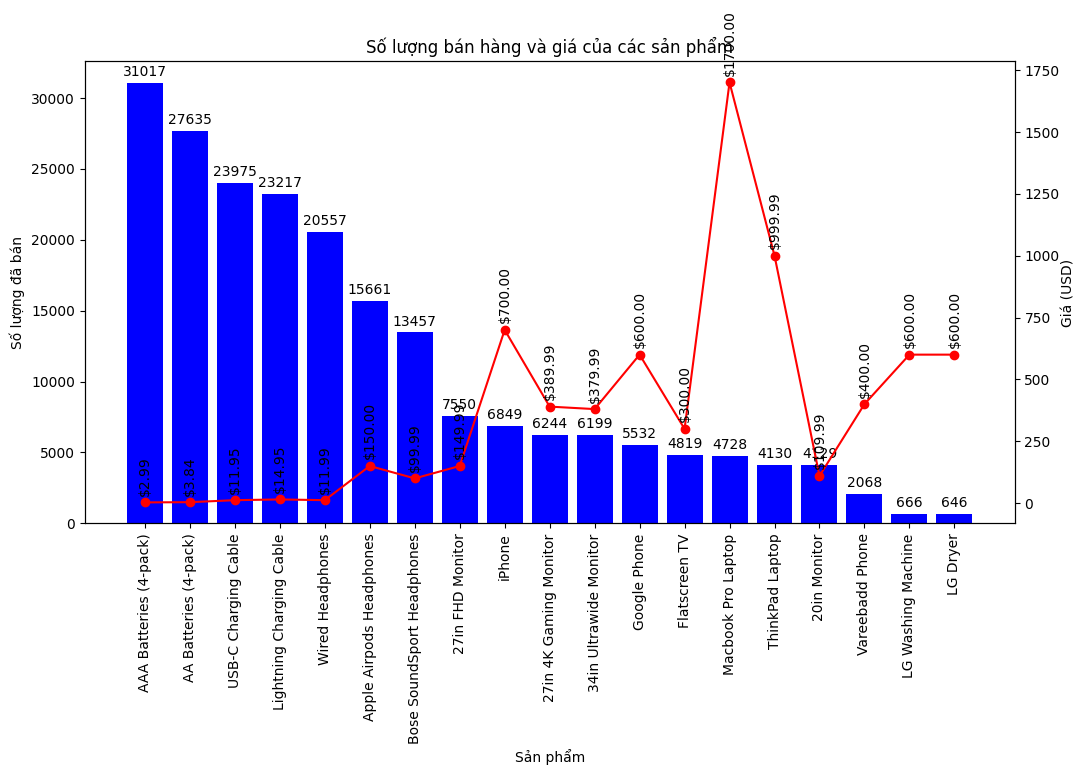

In [33]:
# Nhóm dữ liệu theo sản phẩm và tính tổng số lượng đã bán
grouped_df = df.groupby('Product')['Quantity Ordered'].sum().reset_index()

# Sắp xếp theo số lượng bán hàng giảm dần
sorted_df = grouped_df.sort_values('Quantity Ordered', ascending=False)

# Lấy thông tin về sản phẩm bán chạy nhất
most_sold_product = sorted_df.iloc[0]['Product']
most_sold_quantity = sorted_df.iloc[0]['Quantity Ordered']

# Tạo DataFrame mới với thông tin về sản phẩm và giá
product_prices = df.groupby('Product')['Price Each'].mean().reset_index()
merged_df = pd.merge(sorted_df, product_prices, on='Product')
print(merged_df)

# Vẽ biểu đồ cột
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(merged_df['Product'], merged_df['Quantity Ordered'], color='blue')
ax1.set_xlabel('Sản phẩm')
ax1.set_ylabel('Số lượng đã bán')
ax1.set_title('Số lượng bán hàng và giá của các sản phẩm')
ax1.tick_params(axis='x', rotation=90)
# Hiển thị giá trị trên mỗi cột
for i, value in enumerate(merged_df['Quantity Ordered']):
    ax1.annotate(str(value), xy=(i, value), xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Tạo trục y phụ cho giá sản phẩm
ax2 = ax1.twinx()
ax2.plot(merged_df['Product'], merged_df['Price Each'], color='red', marker='o')
ax2.set_ylabel('Giá (USD)')

# Đặt chú thích cho trục y phụ
ax2.yaxis.set_label_coords(1.05, 0.5)
for x, y in zip(merged_df['Product'], merged_df['Price Each']):
    ax2.annotate(f'${y:.2f}', xy=(x, y), xytext=(0, 7), textcoords='offset points', ha='center', rotation=90)

plt.show()

##### Observations:
+ Dựa trên dữ liệu trên, chúng ta có thể nhận thấy có một mối quan hệ giữa giá bán và số lượng đặt hàng. Thông thường, các sản phẩm có giá bán thấp hơn có xu hướng được đặt hàng nhiều hơn. Tuy nhiên, không phải lúc nào quy tắc này cũng đúng vì có những sản phẩm có giá cao nhưng vẫn có số lượng đặt hàng đáng kể (ví dụ: Apple Airpods Headphones, Macbook Pro Laptop).
+ Điều này cho thấy rằng mối quan hệ giữa giá bán và số lượng đặt hàng không hoàn toàn đồng nhất và có thể bị ảnh hưởng bởi nhiều yếu tố khác nhau như thương hiệu, chất lượng sản phẩm, nhu cầu thị trường và các yếu tố tiếp thị khác.

##### Question 5: Địa chỉ mua hàng có ảnh hưởng đến sản phẩm mà khách hàng mua không?

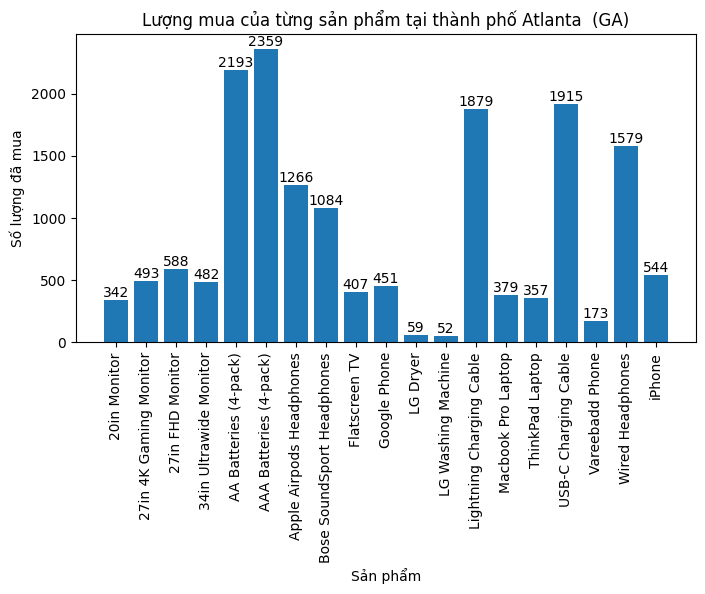

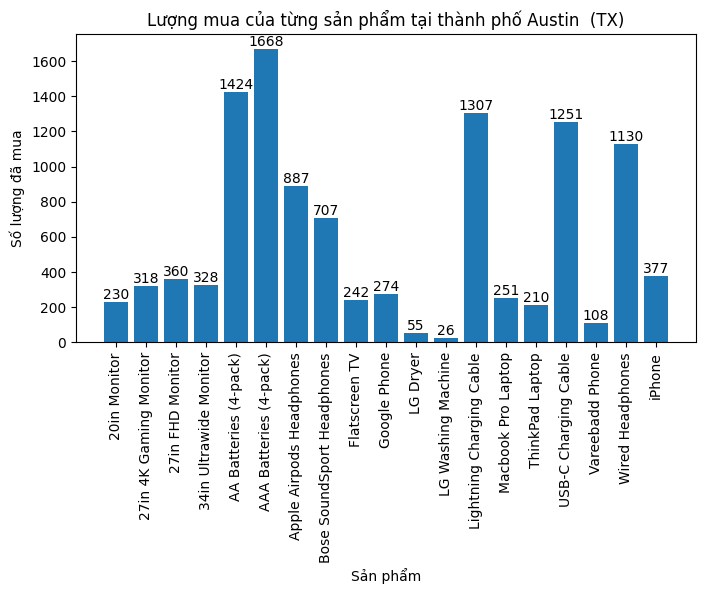

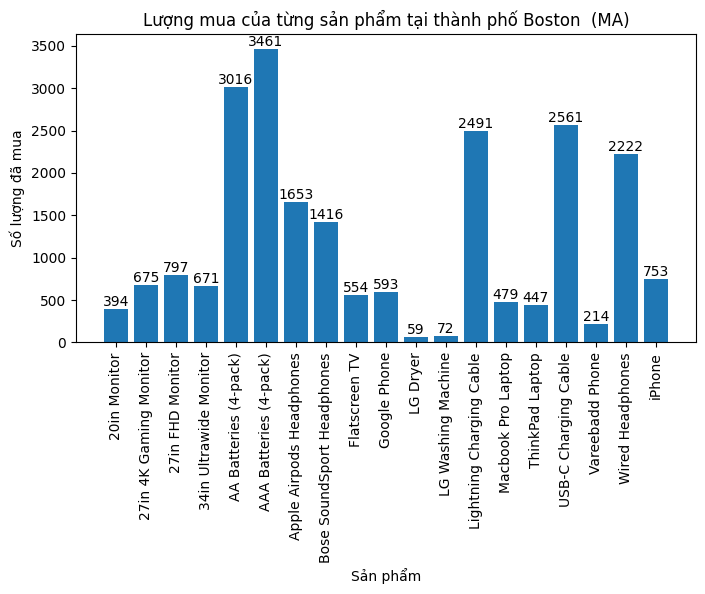

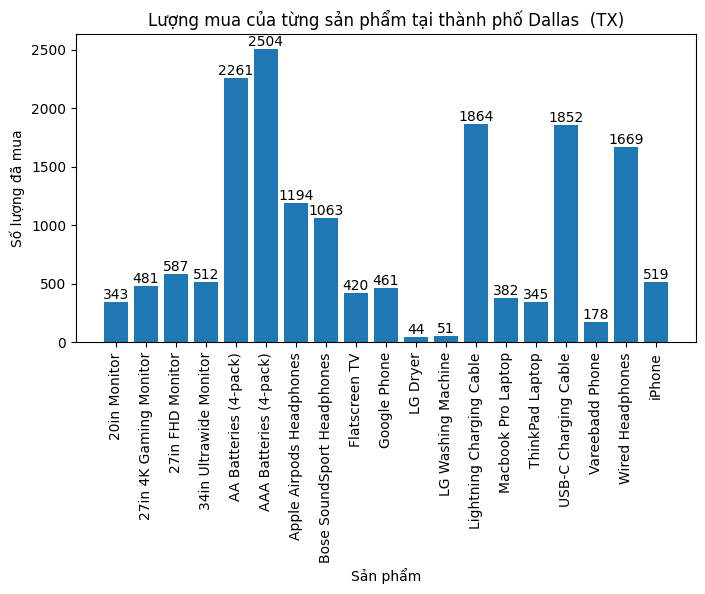

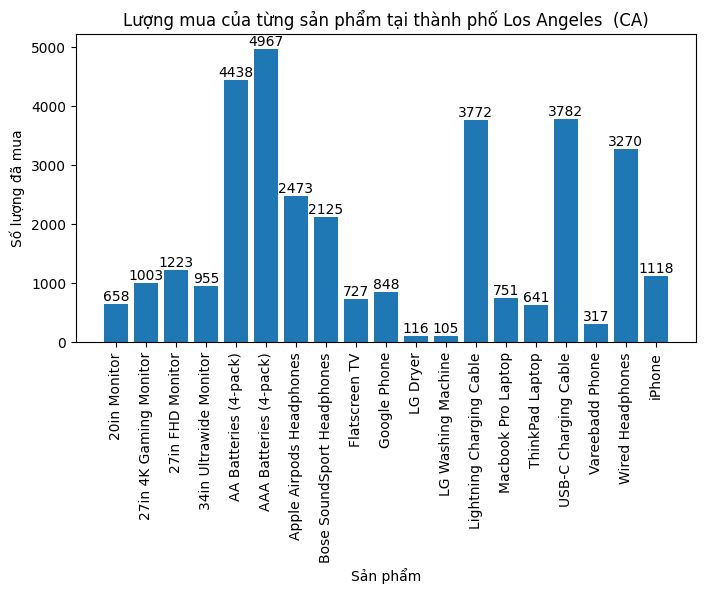

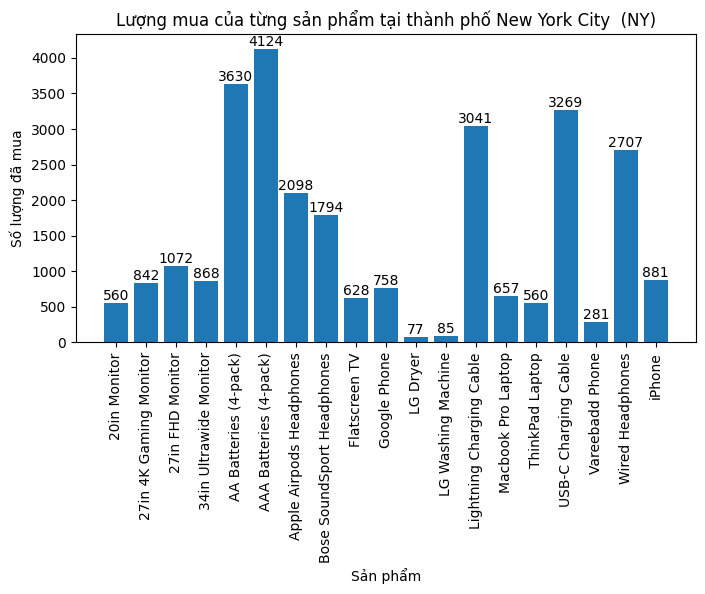

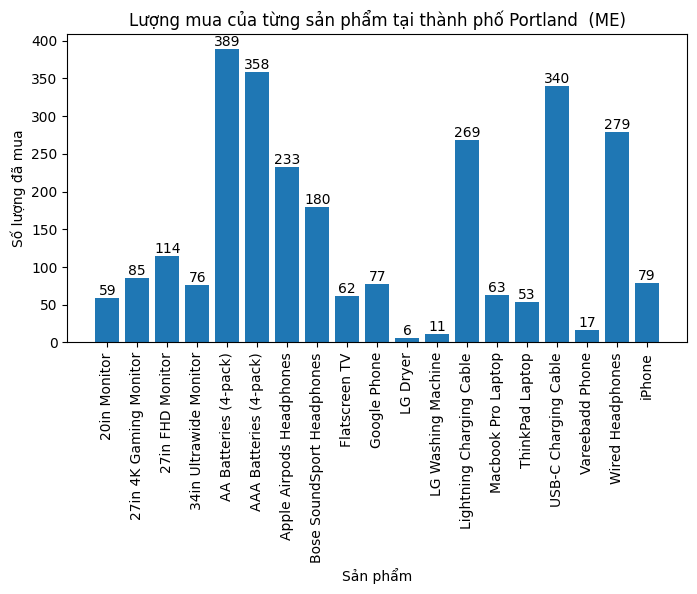

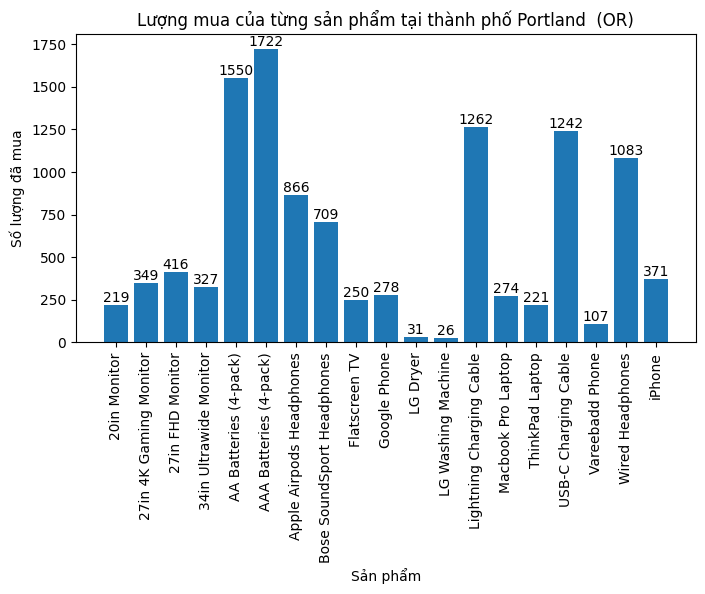

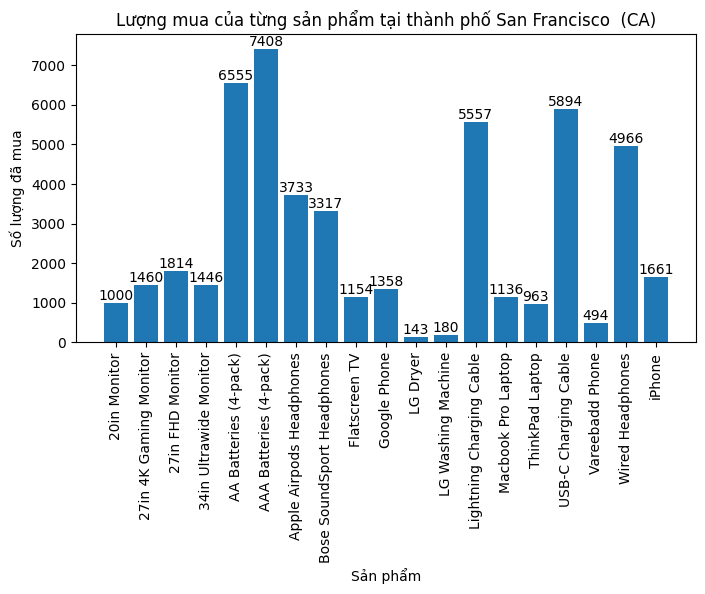

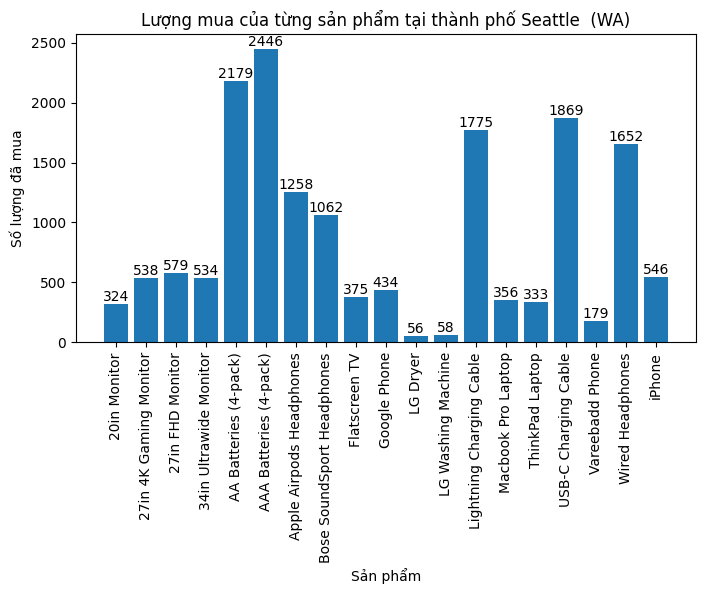

In [34]:
data = df[['City', 'Product', 'Quantity Ordered']]
# Tạo DataFrame mới chỉ chứa các cột 'City', 'Product' và 'Quantity Ordered' từ DataFrame gốc 'df'.

grouped_data = data.groupby(['City', 'Product']).sum().reset_index()
# Nhóm dữ liệu trong 'data' theo cột 'City' và 'Product', tính tổng số lượng đã mua và đặt lại chỉ số của DataFrame.

cities = grouped_data['City'].unique()

products = grouped_data['Product'].unique()

for city in cities:

    plt.figure(figsize=(8, 4))
    # Tạo một hình vẽ mới với kích thước 8x4 inches.

    quantities = grouped_data[grouped_data['City'] == city]['Quantity Ordered']
    # Lấy thông tin số lượng đã mua cho thành phố hiện tại trong vòng lặp.

    x = range(len(products))
    # Tạo một dãy số từ 0 đến (số lượng sản phẩm - 1), sẽ được sử dụng làm trục x của biểu đồ.

    plt.bar(x, quantities)
    plt.xlabel('Sản phẩm')
    plt.ylabel('Số lượng đã mua')
    plt.title(f'Lượng mua của từng sản phẩm tại thành phố {city}')
    plt.xticks(x, products, rotation=90)

    for i, v in enumerate(quantities):
        plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

    plt.show()

##### Observations:
+ Có thể thấy rằng địa chỉ mua hàng (thành phố và tiểu bang) có ảnh hưởng đến số lượng sản phẩm mà khách hàng mua. Mỗi thành phố có một xu hướng mua hàng riêng, và số lượng sản phẩm đã được mua có thể khác nhau giữa các thành phố. Điều này có thể do nhiều yếu tố như sự phát triển kinh tế, sự phổ biến của các sản phẩm trong khu vực, và sự khác biệt trong nhu cầu và ưu tiên của khách hàng.

##### Question 6: Có mỗi quan hệ giữa sản phẩm và số lượng đặt hàng của khách hàng không?

                       Product  Quantity Ordered
5       AAA Batteries (4-pack)             31017
4        AA Batteries (4-pack)             27635
15        USB-C Charging Cable             23975
12    Lightning Charging Cable             23217
17            Wired Headphones             20557
6     Apple Airpods Headphones             15661
7   Bose SoundSport Headphones             13457
2             27in FHD Monitor              7550
18                      iPhone              6849
1       27in 4K Gaming Monitor              6244
3       34in Ultrawide Monitor              6199
9                 Google Phone              5532
8                Flatscreen TV              4819
13          Macbook Pro Laptop              4728
14             ThinkPad Laptop              4130
0                 20in Monitor              4129
16             Vareebadd Phone              2068
11          LG Washing Machine               666
10                    LG Dryer               646


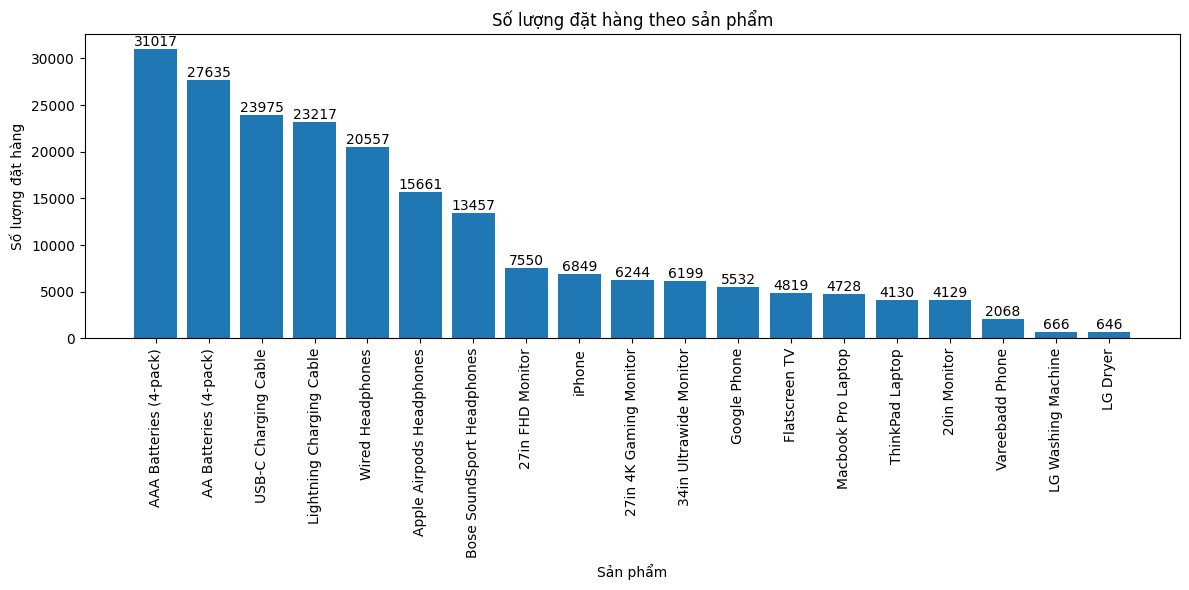

In [35]:
product_quantity = df.groupby('Product')['Quantity Ordered'].sum().reset_index()
# Nhóm dữ liệu theo cột 'Product' và tính tổng số lượng đặt hàng cho mỗi sản phẩm.

product_quantity = product_quantity.sort_values(by='Quantity Ordered', ascending=False)
# Sắp xếp DataFrame 'product_quantity' theo cột 'Quantity Ordered' giảm dần.

print(product_quantity)

plt.figure(figsize=(12, 6))
plt.bar(product_quantity['Product'], product_quantity['Quantity Ordered'])
plt.xticks(rotation=90)
plt.xlabel('Sản phẩm')
plt.ylabel('Số lượng đặt hàng')
plt.title('Số lượng đặt hàng theo sản phẩm')

for i, v in enumerate(product_quantity['Quantity Ordered']):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()

plt.show()

##### Observations:
+ Có mối quan hệ giữa sản phẩm và số lượng đặt hàng của khách hàng. Sản phẩm như pin, cáp sạc, tai nghe, điện thoại di động và laptop có số lượng đặt hàng cao. Điều này cho thấy nhu cầu sử dụng các thiết bị di động và phụ kiện liên quan là khá cao trong thị trường.

### **5.2:** Reflection

Sau tất cả các bước trên, tôi đã có bộ dữ liệu rõ ràng và có thể trả lời các câu hỏi nghiên cứu như trên bằng cách phân tích và biểu diễn nó.

Bằng cách sử dụng các câu hỏi nghiên cứu, Chúng tôi có thể biết:
1. Từ dữ liệu doanh thu, bạn nhận thấy rằng có xu hướng tăng trưởng doanh thu theo thời gian, với các thành phố lớn và kinh đô tài chính có doanh thu cao nhất. Các thành phố nhỏ hơn có thể cần nỗ lực để phát triển thị trường.
2. Các khung giờ nhất định, như giờ 9-12 sáng và giờ 18-21 tối, có số lượng đơn hàng cao nhất trong ngày. Hiển thị quảng cáo trong khoảng thời gian này có thể tối đa hóa khả năng khách hàng mua sản phẩm.
3. Các cặp sản phẩm như 'iPhone' và 'Lightning Charging Cable', cũng như 'Google Phone' và 'USB-C Charging Cable', thường được mua cùng nhau nhất. Điều này cho thấy mối quan hệ hoặc nhu cầu tương tự giữa các sản phẩm này.
4. Có một mối quan hệ giữa giá bán và số lượng đặt hàng, với các sản phẩm giá thấp hơn thường được đặt hàng nhiều hơn. Tuy nhiên, quy tắc này không áp dụng tuyệt đối, vì có những sản phẩm có giá cao nhưng vẫn có số lượng đặt hàng đáng kể.
5. Địa chỉ mua hàng có ảnh hưởng đến sản phẩm mà khách hàng mua. Mỗi thành phố có xu hướng mua hàng riêng, và số lượng sản phẩm đã được mua có thể khác nhau giữa các thành phố.
6. Có mối quan hệ giữa sản phẩm và số lượng đặt hàng của khách hàng. Các sản phẩm như pin, cáp sạc, tai nghe, điện thoại di động và laptop có số lượng đặt hàng cao, cho thấy nhu cầu sử dụng các thiết bị di động và phụ kiện liên quan là cao trong thị trường.

#### SUBMISSION

After completion, export the notebook as an HTML file for the project submission using the File > Download as... > HTML or PDF menu option.

Submit file “my_Project.zip” to Final Project includes:

    1. my_Project.html
    2. my _Project.ipynb
